In [2]:
#Read scotch.csv and check the unique labels in each dist and region

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Scotch = pd.read_csv('scotch.csv')
Scotch.head()
print(Scotch['region'].unique())
print(Scotch['dist'].unique())



print(Scotch.groupby('region').size())



['HIGH' 'ISLAY' 'LOW' 'LOW ']
[2 4 5 3 1]
region
HIGH     89
ISLAY     8
LOW      11
LOW       1
dtype: int64


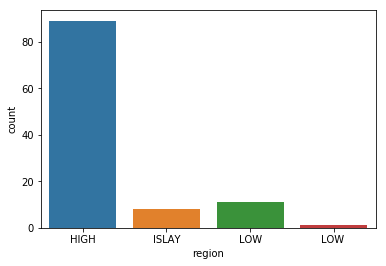

In [3]:
#Plot on a graph the counts of each region
sns.countplot(Scotch['region'],label="Count")
plt.show()
plt.close()

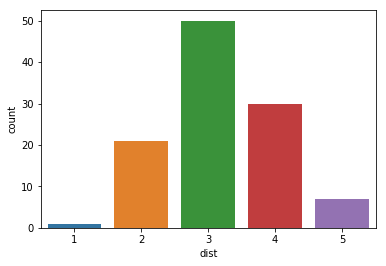

In [4]:
#plot on a graph the counts of each dist
sns.countplot(Scotch['dist'],label="Count")
plt.show()

#Concatinate Region and District to create a single label 

#Scotch['regiondist'] = Scotch.dist.astype(str).str.cat(Scotch.region.astype(str), sep='-')

plt.close()

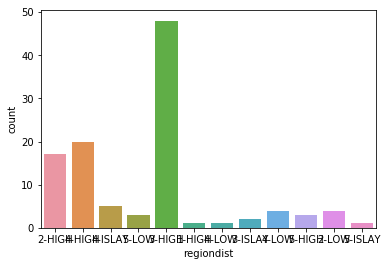

In [5]:
#First concat the dist-region to create a single label

Scotch['regiondist'] = Scotch.dist.astype(str).str.cat(Scotch.region.astype(str), sep='-')

#Plot on a graph the counts of dist-region 
sns.countplot(Scotch['regiondist'],label="Count")
#plt.figure(figsize=(40,4))
#plt.show()
plt.rcParams["figure.figsize"] = [13,5]
plt.show()
plt.close()

In [6]:
#Features and labels for Classifying regions
from sklearn.preprocessing import MultiLabelBinarizer
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

#The features that will be used for Training & Testing
featurenames = ['color.wyne',
 'color.yellow',
 'color.v.pale',
 'color.pale',
 'color.p.gold',
 'color.gold',
 'color.o.gold',
 'color.f.gold',
 'color.bronze',
 'color.p.amber',
 'color.amber',
 'color.f.amber',
 'color.red',
 'color.sherry',
 'nose.aroma',
 'nose.peat',
 'nose.sweet',
 'nose.light',
 'nose.fresh',
 'nose.dry',
 'nose.fruit',
 'nose.grass',
 'nose.sea',
 'nose.sherry',
 'nose.spicy',
 'nose.rich',
 'body.soft',
 'body.med',
 'body.full',
 'body.round',
 'body.smooth',
 'body.light',
 'body.firm',
 'body.oily',
 'pal.full',
 'pal.dry',
 'pal.sherry',
 'pal.big',
 'pal.light',
 'pal.smooth',
 'pal.clean',
 'pal.fruit',
 'pal.grass',
 'pal.smoke',
 'pal.sweet',
 'pal.spice',
 'pal.oil',
 'pal.salt',
 'pal.arome',
 'fin.full',
 'fin.dry',
 'fin.war',
 'fin.big',
 'fin.light',
 'fin.smooth',
 'fin.clean',
 'fin.fruit',
 'fin.grass',
 'fin.smoke',
 'fin.sweet',
 'fin.spice',
 'fin.oil',
 'fin.salt',
 'fin.arome',
 'fin.ling',
 'fin.long',
 'fin.very',
 'fin.quick'
, 'age'
#,
 #'dist',
,'score'
 #'region'
    ]

#Scotch['regiondist'] = Scotch.dist.astype(str).str.cat(Scotch.region.astype(str), sep='-')

X = Scotch[featurenames]
#y = Scotch['regiondist']
y = Scotch['region']

#MultiLabelBinarizer().fit_transform(y)
#Scotch['region-dist'].head()
print(Scotch['regiondist'].unique())
#y2 = Scotch['dist']


['2-HIGH' '4-HIGH' '4-ISLAY' '5-LOW' '3-HIGH' '1-HIGH' '4-LOW ' '3-ISLAY'
 '4-LOW' '5-HIGH' '2-LOW' '5-ISLAY']


In [7]:
#Creating Train and Test Data for Classifying the Regions

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/user/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
#Building decision tree model for classifying Regions-Districts and check the accuracy of model on Train and Test data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on test set: 0.82


In [16]:
#visualize the tree and save it into a pdf file
import graphviz 

target_names = Scotch['regiondist']

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=featurenames,  
                      class_names=target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
#dot_data = tree.export_graphviz(clf, out_file=None)
#graph = graphviz.Source(dot_data) 
graph.render("Scotch-tree") 

plt.show()
